### Creating a Logistic Regression based on the bank data provided using sklearn module

##### 1.The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
##### 2. The first column of the dataset is the index.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Loading the data

In [2]:
raw_data=pd.read_csv('Bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
# Since there are two same index we remove one of them
data_train=raw_data.copy()
data_train=data_train.drop(['Unnamed: 0'],axis=1)
# Mapping the data as 'yes' to 1 and 'no' to 0
data_train['y']=data_train['y'].map({'yes':1,'no':0})
data_train.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [4]:
# Printing the descriptive summary of the given dataset
data_train.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declaring the dependent and independent variables for training data

In [5]:
y_train=data_train['y']
estimators=['interest_rate','credit','march','may','previous','duration']
x_train=data_train[estimators]

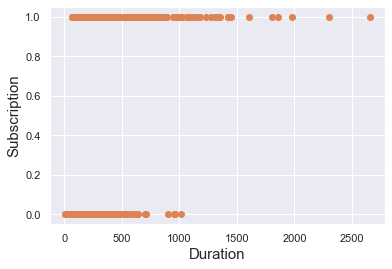

In [6]:
# Exploring the data with scatter plot
plt.scatter(x_train['duration'],y_train,color='C1')
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Subscription',fontsize=15)
plt.show()

In [7]:
# Standardization of training data
# Importing the library for standardizing the data since the range of duration is higher than the dependent variable
from sklearn.preprocessing import StandardScaler

scaler1=StandardScaler()
scaler1.fit(x_train)
x_scaled_train=scaler1.transform(x_train)

### Logistic Regression

In [8]:
# Importing the relevent module for performing LogisticRegression
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(x_scaled_train,y_train)

LogisticRegression()

In [9]:
# The bias or intercept for the model
logisticReg.intercept_

array([0.14974433])

In [10]:
# The weights of the different parameters taken for the analysis
C=logisticReg.coef_
coef1=C.flatten()
coef1

array([-1.38402633,  0.41940142, -0.756611  ,  0.16526338,  0.41420103,
        2.23619706])

In [11]:
# p-values for all the variables
from sklearn.feature_selection import f_regression
f_regression(x_scaled_train,y_train)

(array([160.6967201 ,  15.10704483,  17.96163865,  51.51759229,
         55.90191708, 136.58219486]),
 array([2.99846569e-32, 1.14830575e-04, 2.67049633e-05, 2.48511073e-12,
        3.29300487e-13, 3.71235617e-28]))

In [12]:
p_values=f_regression(x_scaled_train,y_train)[1]

In [13]:
# Making a nice summary table with the parameters, corresponding weights and p values
coef_table=pd.DataFrame(data=x_train.columns.values,columns=['Features'])
coef_table['coefficients']=coef1
coef_table['p values']=p_values.round(5)
coef_table
# all the variables are significant in the prediction 

,Features,coefficients,p values
0,interest_rate,-1.384026,0.00000
1,credit,0.419401,0.00011
2,march,-0.756611,0.00003
3,may,0.165263,0.00000
4,previous,0.414201,0.00000
5,duration,2.236197,0.00000


In [14]:
# Predicted values from the Logistic Regression
y_pred_train=logisticReg.predict(x_scaled_train)

In [15]:
# Accuracy of the training dataset
logisticReg.score(x_scaled_train,y_train)

0.861003861003861

### Confusion Matrix for the training dataset

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_train,logisticReg.predict(x_scaled_train))
# Thus, Logistic Regression on training dataset gives us 218 True positives and 228 True negatives with 86.1% accuracy

array([[218,  41],
       [ 31, 228]], dtype=int64)

### Testing the model

In [18]:
# loading the test data
raw_data2=pd.read_csv('Bank-data-testing.csv')
raw_data2.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [19]:
test_data=raw_data2.copy()
test_data=test_data.drop(['Unnamed: 0'],axis=1)
# Mapping the data as 'yes' to 1 and 'no' to 0
test_data['y']=test_data['y'].map({'yes':1,'no':0})
test_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


In [20]:
# Declare the dependent and independent variables
y_test=test_data['y']
x_test=test_data[estimators]

In [21]:
# Standardizing the test data
scaler2=StandardScaler()
scaler2.fit(x_test)
x_scaled_test=scaler2.transform(x_test)

In [23]:
# Predicted values for test data
predicted_test_data=logisticReg.predict(x_scaled_test)

In [24]:
# Drawing the confusion matrix for the test data
confusion_matrix(y_test,logisticReg.predict(x_scaled_test))

array([[ 94,  17],
       [ 11, 100]], dtype=int64)

In [25]:
# Overall Accuracy of our model
logisticReg.score(x_scaled_test,y_test)

0.8738738738738738

###### Looking at the test acccuracy we see that we get an accuracy of 87.4%, compared to 86.1% for train accuracy.